#q1
@task(retries=3, retry_delay_seconds=2, name="Read taxi data")
#q2
- the first one 0 9 3 * *

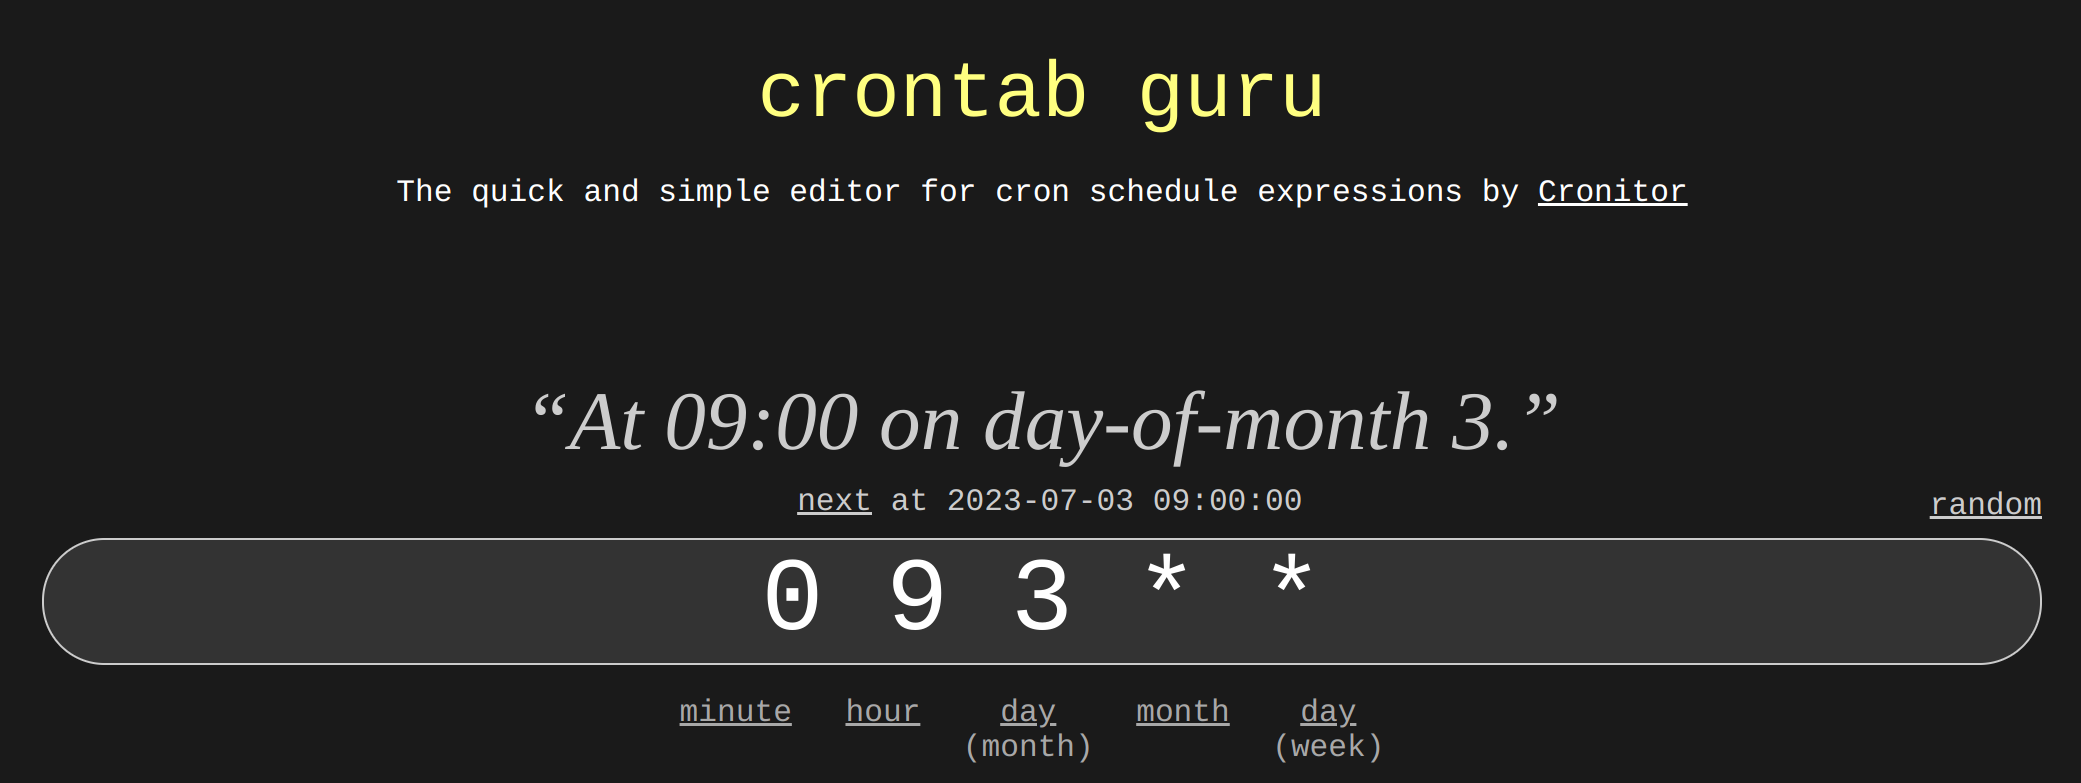

In [1]:
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet" -O ./data/green_tripdata_2023-01.parquet
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet" -O ./data/green_tripdata_2023-02.parquet
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet" -O ./data/green_tripdata_2023-03.parquet

--2023-06-09 04:08:57--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.226.4.64, 13.226.4.101, 13.226.4.208, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.226.4.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1730999 (1.7M) [binary/octet-stream]
Saving to: ‘./data/green_tripdata_2023-03.parquet’

./data/green_tripda 100%[===================>]   1.65M  1.44MB/s    in 1.2s    

2023-06-09 04:08:59 (1.44 MB/s) - ‘./data/green_tripdata_2023-03.parquet’ saved [1730999/1730999]



In [6]:
import pandas as pd
# Provide the URL of the Parquet file
training_url = "./data/green_tripdata_2023-01.parquet"

# Read the Parquet file into a pandas DataFrame
train_df = pd.read_parquet(training_url)

# Explore the DataFrame or perform further data processing
print(train_df.head())

# Provide the URL of the Parquet file
validation_url = "./data/green_tripdata_2023-02.parquet"

# Read the Parquet file into a pandas DataFrame
val_df = pd.read_parquet(validation_url)

# Explore the DataFrame or perform further data processing
print(val_df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0   

In [2]:
#!prefect config view --show-defaults
!prefect config view

# clear config setting to avoid a bug in set
!prefect config unset PREFECT_API_URL

# use a local Prefect server
!prefect config set PREFECT_API_URL="http://prefect:4200/api"

# use Prefect Cloud
# !prefect config set PREFECT_API_URL="https://api.prefect.cloud/api/accounts/[ACCOUNT-ID]/workspaces/[WORKSPACE-ID]"


PREFECT_PROFILE='default'
PREFECT_API_URL='http://prefect:4200/api' (from profile)
Unset 'PREFECT_API_URL'.
Updated profile 'default'.
Set 'PREFECT_API_URL' to 'http://prefect:4200/api'.
Updated profile 'default'.


In [3]:
#!pip install -r requirements.txt
!python3 orchestrate.py

04:09:45.968 | INFO    | prefect.engine - Created flow run 'thundering-termite' for flow 'main-flow'
04:09:46.737 | INFO    | Flow run 'thundering-termite' - Created task run 'read_data-0' for task 'read_data'
04:09:46.739 | INFO    | Flow run 'thundering-termite' - Executing 'read_data-0' immediately...
04:09:47.330 | INFO    | Task run 'read_data-0' - Finished in state Completed()
04:09:47.354 | INFO    | Flow run 'thundering-termite' - Created task run 'read_data-1' for task 'read_data'
04:09:47.355 | INFO    | Flow run 'thundering-termite' - Executing 'read_data-1' immediately...
04:09:47.736 | INFO    | Task run 'read_data-1' - Finished in state Completed()
04:09:47.761 | INFO    | Flow run 'thundering-termite' - Created task run 'add_features-0' for task 'add_features'
04:09:47.761 | INFO    | Flow run 'thundering-termite' - Executing 'add_features-0' immediately...
04:09:48.287 | INFO    | Task run 'add_features-0' - Finished in state Completed()
04:09:48.314 | INFO    | Flow ru

In [ ]:
# git remote -V
#prefect project init

#q3: rmse 5.19931